##### https://www.kaggle.com/code/gurpreetchaggar/decision-tree-classifier-for-car-safety-data

In [1]:
import os
from sklearn.tree import DecisionTreeClassifier as des
import sklearn.tree as tree
from sklearn.model_selection import train_test_split as tr
import sklearn.metrics as met
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pre
import category_encoders as ce

C:\Users\RITWIK GANGULY\anaconda3\envs\Ritwik_DATA_Sci\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
os.chdir(r"C:\Users\RITWIK GANGULY\Downloads\Data Analysis")

In [3]:
df = pd.read_csv("car_evaluation.csv")
df.head()

,buying price,maintainance cost,noofdoors,noofpersons,lug_boots,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df["decision"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [5]:
df["buying price"].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying price, dtype: int64

In [6]:
df["maintainance cost"].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maintainance cost, dtype: int64

In [7]:
df["noofdoors"].value_counts()

2        432
3        432
4        432
5more    432
Name: noofdoors, dtype: int64

In [8]:
df["lug_boots"].value_counts()

small    576
med      576
big      576
Name: lug_boots, dtype: int64

In [9]:
df["noofpersons"].value_counts()

2       576
4       576
more    576
Name: noofpersons, dtype: int64

In [10]:
df["safety"].value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data = df.copy()

In [7]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [11]:
data["buying"] = data["buying"].map({'vhigh':1, 'high':2, 'med':3, 'low':4})
data

,buying,maint,doors,persons,lug_boot,safety,class
0,NaN,vhigh,2,2,small,low,unacc
1,NaN,vhigh,2,2,small,med,unacc
2,NaN,vhigh,2,2,small,high,unacc
3,NaN,vhigh,2,2,med,low,unacc
4,NaN,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,NaN,low,5more,more,med,med,good
1724,NaN,low,5more,more,med,high,vgood
1725,NaN,low,5more,more,big,low,unacc
1726,NaN,low,5more,more,big,med,good


In [44]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']].values
X[0:10]

array([['vhigh', 'vhigh', '2', '2', 'small', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'high'],
       ['vhigh', 'vhigh', '2', '2', 'med', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'med', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'med', 'high'],
       ['vhigh', 'vhigh', '2', '2', 'big', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'big', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'big', 'high'],
       ['vhigh', 'vhigh', '2', '4', 'small', 'low']], dtype=object)

In [22]:
X = df.drop("class", axis = 1)
y = df["class"]

In [23]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [16]:
X.shape

(1728, 6)

In [17]:
y = df[["class"]]
y.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [45]:
pe_bp = pre.LabelEncoder()
pe_bp.fit(["vhigh", "high", "med", "low"])
X[:,1] = pe_bp.transform(X[:,1])

pe_mc = pre.LabelEncoder()
pe_mc.fit(["vhigh", "high", "med", "low"])
X[:, 2] = pe_mc.transform(X[:, 2])

pe_lb = pre.LabelEncoder()
pe_lb.fit(["small", "med", "big"])
X[:, 4] = pe_lb.transform(X[:, 4])

pe_nop = pre.LabelEncoder()
pe_nop.fit(["2", "4", "more"])
X[:, 5] = pe_nop.transform(X[:, 5])

pe_saf = pre.LabelEncoder()
pe_saf.fit(["low", "med", "high"])
X[:, 6] = pe_bp.transform(X[:, 6])

X[0:10]

ValueError: y contains previously unseen labels: '2'

In [24]:
X_train, X_test, y_train, y_test = tr(X, y, test_size=0.3, random_state=3)

###### preprocessing the data

In [46]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [47]:
X_train

,buying,maint,doors,persons,lug_boot,safety
863,1,1,1,1,1,1
353,2,1,2,2,2,1
1580,3,2,3,3,3,1
590,1,3,2,1,3,1
851,1,1,1,3,3,1
...,...,...,...,...,...,...
968,4,4,1,1,3,1
952,4,4,1,2,1,3
1667,3,1,2,1,2,1
1273,4,1,1,2,3,3


In [28]:
X.head(10)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high
6,vhigh,vhigh,2,2,big,low
7,vhigh,vhigh,2,2,big,med
8,vhigh,vhigh,2,2,big,high
9,vhigh,vhigh,2,4,small,low


In [54]:
X_train.shape

(1209, 6)

In [55]:
y_train.shape

(1209, 1)

In [30]:
drugtree = des(criterion="entropy", max_depth=4)

In [31]:
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
pred = drugtree.predict(X_test)

In [36]:
print(pred[0:10])

['unacc' 'unacc' 'unacc' 'unacc' 'vgood' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc']


In [38]:
print(y_test[0:10])

350       acc
112     unacc
1011    unacc
715       acc
1280     good
193     unacc
73      unacc
1354    unacc
570     unacc
1119    unacc
Name: class, dtype: object


In [48]:
met.accuracy_score(y_test, pred)

0.7707129094412332

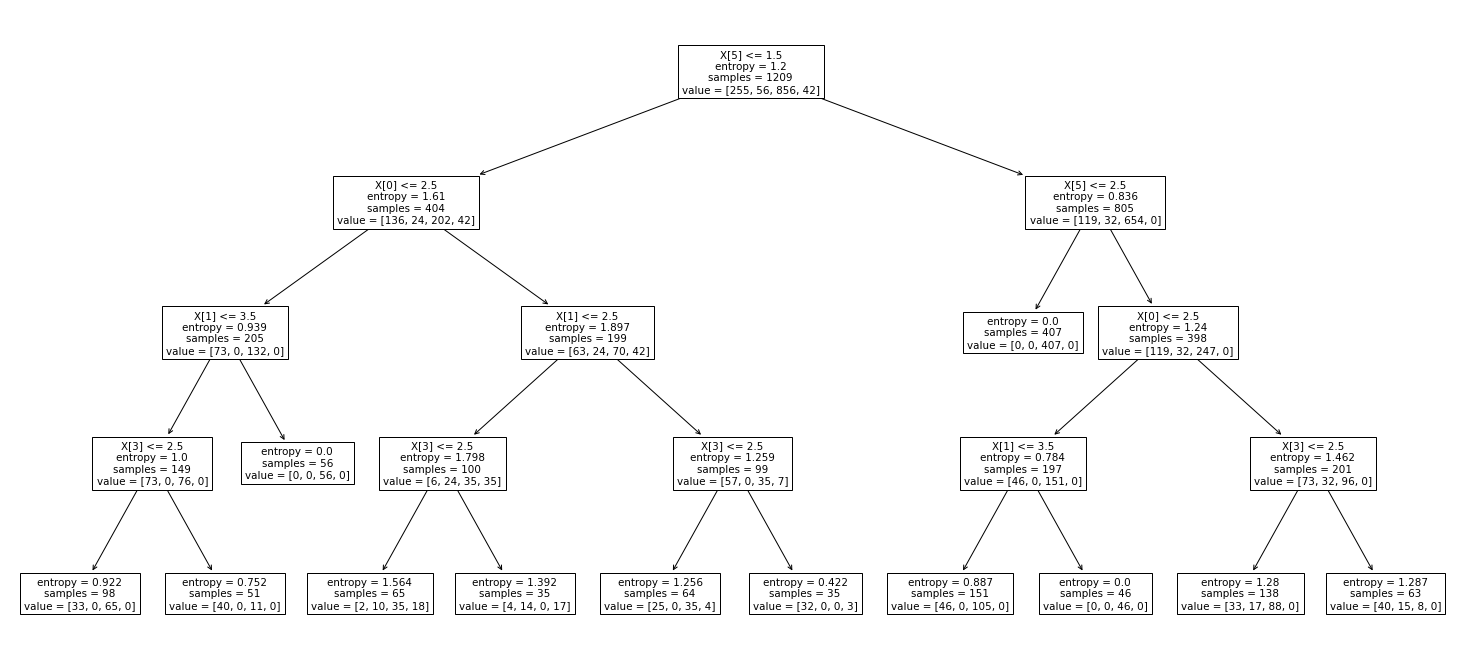

In [43]:
plt.figure(figsize=(26, 12))
tree.plot_tree(drugtree)
plt.show()